In [109]:

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
# Cargar los datos
cyber_data = pd.read_csv('cybersecurity_attacks.csv')


In [110]:
cyber_data.head(5)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [111]:
# Calculamos el porcentaje de valores nulos en cada columna
missing_values = cyber_data.isnull().mean() * 100
missing_values

Timestamp                  0.0000
Source IP Address          0.0000
Destination IP Address     0.0000
Source Port                0.0000
Destination Port           0.0000
Protocol                   0.0000
Packet Length              0.0000
Packet Type                0.0000
Traffic Type               0.0000
Payload Data               0.0000
Malware Indicators        50.0000
Anomaly Scores             0.0000
Alerts/Warnings           50.1675
Attack Type                0.0000
Attack Signature           0.0000
Action Taken               0.0000
Severity Level             0.0000
User Information           0.0000
Device Information         0.0000
Network Segment            0.0000
Geo-location Data          0.0000
Proxy Information         49.6275
Firewall Logs             49.9025
IDS/IPS Alerts            50.1250
Log Source                 0.0000
dtype: float64

In [112]:
# Transformar los valores de "Malware Indicators" a 1 o 0
cyber_data['Malware Indicators'] = cyber_data['Malware Indicators'].apply(lambda x: 1 if x == "IoC Detected" else 0)


In [113]:
print(cyber_data['Malware Indicators'].unique())


[1 0]


In [114]:
print(cyber_data['Malware Indicators'])

0        1
1        1
2        1
3        0
4        0
        ..
39995    1
39996    1
39997    1
39998    1
39999    0
Name: Malware Indicators, Length: 40000, dtype: int64


In [115]:
# Transformar los valores de "Alerts/Warnings" a 1 o 0
cyber_data['Alerts/Warnings'] = cyber_data['Alerts/Warnings'].apply(lambda x: 1 if x == "Alert Triggered" else 0)

# Transformar los valores de "Alerts/Warnings" a 1 o 0
cyber_data['IDS/IPS Alerts'] = cyber_data['IDS/IPS Alerts'].apply(lambda x: 1 if x == "Alert Data" else 0)

In [116]:
# Calcular el porcentaje de valores nulos en cada columna
missing_values = cyber_data.isnull().mean() * 100
missing_values

Timestamp                  0.0000
Source IP Address          0.0000
Destination IP Address     0.0000
Source Port                0.0000
Destination Port           0.0000
Protocol                   0.0000
Packet Length              0.0000
Packet Type                0.0000
Traffic Type               0.0000
Payload Data               0.0000
Malware Indicators         0.0000
Anomaly Scores             0.0000
Alerts/Warnings            0.0000
Attack Type                0.0000
Attack Signature           0.0000
Action Taken               0.0000
Severity Level             0.0000
User Information           0.0000
Device Information         0.0000
Network Segment            0.0000
Geo-location Data          0.0000
Proxy Information         49.6275
Firewall Logs             49.9025
IDS/IPS Alerts             0.0000
Log Source                 0.0000
dtype: float64

In [117]:
cyber_data.drop(columns=["Proxy Information", "Firewall Logs"], axis=1, inplace=True)

In [118]:
# Calcular el porcentaje de valores nulos en cada columna
missing_values = cyber_data.isnull().mean() * 100
missing_values

Timestamp                 0.0
Source IP Address         0.0
Destination IP Address    0.0
Source Port               0.0
Destination Port          0.0
Protocol                  0.0
Packet Length             0.0
Packet Type               0.0
Traffic Type              0.0
Payload Data              0.0
Malware Indicators        0.0
Anomaly Scores            0.0
Alerts/Warnings           0.0
Attack Type               0.0
Attack Signature          0.0
Action Taken              0.0
Severity Level            0.0
User Information          0.0
Device Information        0.0
Network Segment           0.0
Geo-location Data         0.0
IDS/IPS Alerts            0.0
Log Source                0.0
dtype: float64

In [119]:
cyber_data.describe()

,Source Port,Destination Port,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,IDS/IPS Alerts
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,0.500000,50.113473,0.498325,0.498750
std,18560.425604,18574.668842,416.044192,0.500006,28.853598,0.500003,0.500005
min,1027.000000,1024.000000,64.000000,0.000000,0.000000,0.000000,0.000000
25%,16850.750000,17094.750000,420.000000,0.000000,25.150000,0.000000,0.000000
50%,32856.000000,33004.500000,782.000000,0.500000,50.345000,0.000000,0.000000
75%,48928.250000,49287.000000,1143.000000,1.000000,75.030000,1.000000,1.000000
max,65530.000000,65535.000000,1500.000000,1.000000,100.000000,1.000000,1.000000


In [120]:
cyber_data.isnull().any()

Timestamp                 False
Source IP Address         False
Destination IP Address    False
Source Port               False
Destination Port          False
Protocol                  False
Packet Length             False
Packet Type               False
Traffic Type              False
Payload Data              False
Malware Indicators        False
Anomaly Scores            False
Alerts/Warnings           False
Attack Type               False
Attack Signature          False
Action Taken              False
Severity Level            False
User Information          False
Device Information        False
Network Segment           False
Geo-location Data         False
IDS/IPS Alerts            False
Log Source                False
dtype: bool

In [121]:
cyber_data.dtypes

Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators          int64
Anomaly Scores            float64
Alerts/Warnings             int64
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
IDS/IPS Alerts              int64
Log Source                 object
dtype: object

In [122]:
# Convertimos 'Timestamp' al tipo de datos de fecha
cyber_data['Timestamp'] = pd.to_datetime(cyber_data['Timestamp'])

cyber_data['Year'] = cyber_data['Timestamp'].dt.year
cyber_data['Month'] = cyber_data['Timestamp'].dt.month
cyber_data['Day'] = cyber_data['Timestamp'].dt.day
cyber_data['Hour'] = cyber_data['Timestamp'].dt.hour
cyber_data['DayOfWeek'] = cyber_data['Timestamp'].dt.dayofweek  # 0 = Lunes, 6 = Domingo


In [123]:
variables_of_interest = ['Anomaly Scores', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']
# Calculamos matriz correlacion
correlation_matrix = cyber_data[variables_of_interest].corr()
# Pintamos matrix
print("Matriz de correlación entre variables de interés:")
print(correlation_matrix)

Matriz de correlación entre variables de interés:
                Anomaly Scores      Year     Month       Day      Hour  \
Anomaly Scores        1.000000 -0.000160  0.004564  0.000203  0.001039   
Year                 -0.000160  1.000000 -0.124595 -0.008153 -0.000314   
Month                 0.004564 -0.124595  1.000000 -0.004917 -0.008453   
Day                   0.000203 -0.008153 -0.004917  1.000000  0.007479   
Hour                  0.001039 -0.000314 -0.008453  0.007479  1.000000   
DayOfWeek             0.000303 -0.003357 -0.001849 -0.001364 -0.004692   

                DayOfWeek  
Anomaly Scores   0.000303  
Year            -0.003357  
Month           -0.001849  
Day             -0.001364  
Hour            -0.004692  
DayOfWeek        1.000000  


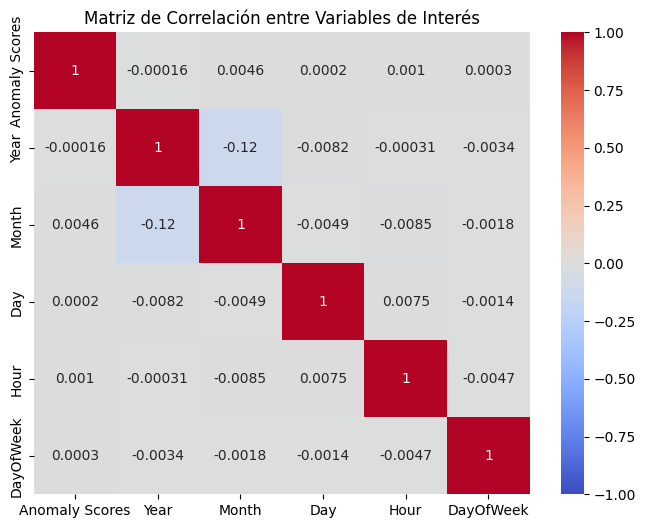

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Creamos el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Variables de Interés")
plt.show()


In [125]:
# Eliminamos las columnas Timestamp y Unnamed: 0

# Como no existe ninguna correlacion con las fechas procedemos a eliminar la variable
cyber_data = cyber_data.drop(['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek'], axis=1)
cyber_data.head(5).T

,0,1,2,3,4
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...
Malware Indicators,1,1,1,0,0


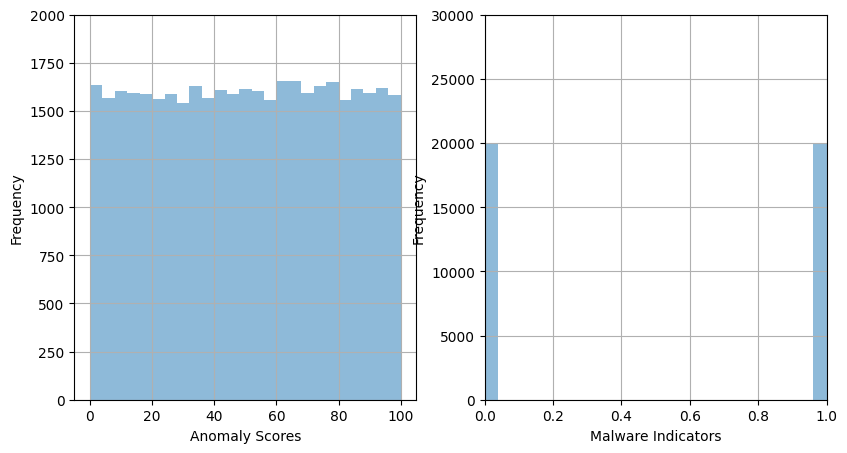

In [126]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
cyber_data['Anomaly Scores'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
plt.ylim(0, 2000)
plt.xlabel('Anomaly Scores')

plt.subplot(1,3,2)
cyber_data['Malware Indicators'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0,30000)
plt.xlim(0,1)
plt.xlabel('Malware Indicators')


plt.show()

In [127]:
# Calculamos el promedio de 'Anomaly Scores' por 'Attack Type'
impact_mean = cyber_data.groupby('Attack Type')['Anomaly Scores'].mean()

# Mostramos el resultado
print(impact_mean)


Attack Type
DDoS         50.235063
Intrusion    49.978029
Malware      50.125794
Name: Anomaly Scores, dtype: float64


In [128]:
# Calculamos la probabilidad de cada valor de 'Action Taken' dado cada tipo de 'Attack Type'
impact_encoding = cyber_data.groupby('Attack Type')['Action Taken'].value_counts(normalize=True).unstack()

# Mostramos el resultado para revisar
print("Probabilidades condicionales de 'Action Taken' dado 'Attack Type':")
print(impact_encoding)


Probabilidades condicionales de 'Action Taken' dado 'Attack Type':
Action Taken   Blocked   Ignored    Logged
Attack Type                               
DDoS          0.337578  0.332067  0.330354
Intrusion     0.343234  0.331775  0.324991
Malware       0.333884  0.331855  0.334260


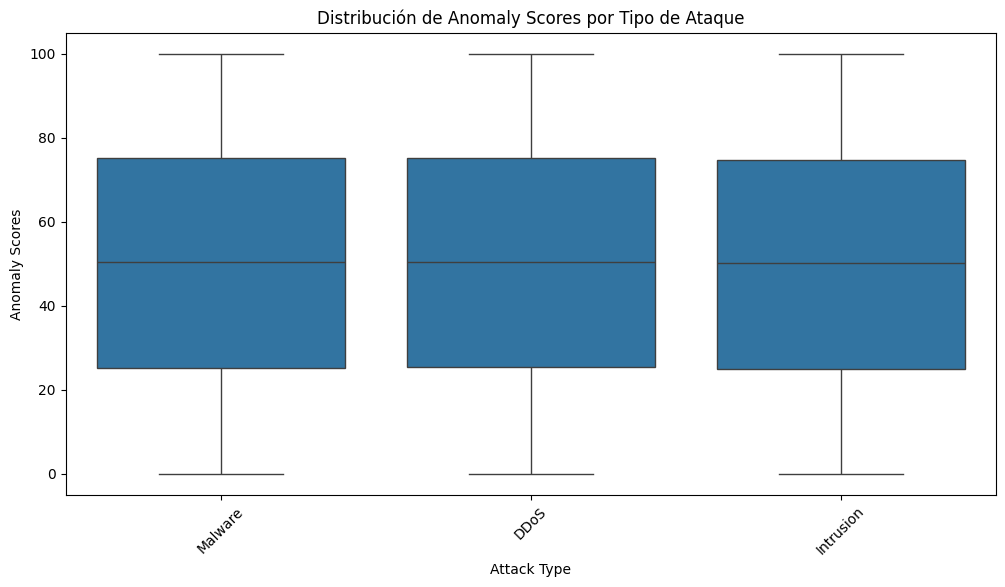

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Attack Type', y='Anomaly Scores', data=cyber_data)
plt.xticks(rotation=45)
plt.title('Distribución de Anomaly Scores por Tipo de Ataque')
plt.show()


In [130]:

# Payload data podria ser util, pero no hemos aprendido a sacar features de texto natural (es mas deep learning) y ademas el dato es Lorem Ipsum, con lo que a priori no parece que tenga información.
# las eliminamos
useless_cols = ["Source IP Address", "Destination IP Address", "Payload Data"]
cols_to_predict = ["Action Taken", "Severity Level", "Attack Type"]
cyber_data = cyber_data.drop(columns=useless_cols)
cyber_data.head()

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,IDS/IPS Alerts,Log Source
0,31225,17616,ICMP,503,Data,HTTP,1,28.67,0,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",0,Server
1,17245,48166,ICMP,1174,Data,HTTP,1,51.50,0,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",0,Firewall
2,16811,53600,UDP,306,Control,HTTP,1,87.42,1,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",1,Firewall
3,20018,32534,UDP,385,Data,HTTP,0,15.79,1,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",1,Firewall
4,6131,26646,TCP,1462,Data,DNS,0,0.52,1,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",1,Firewall


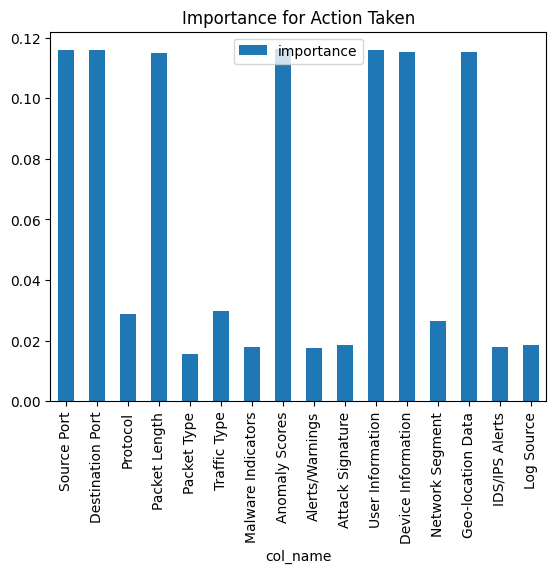

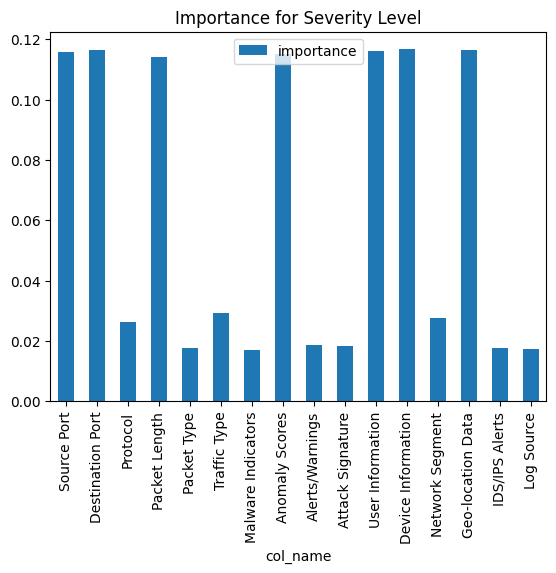

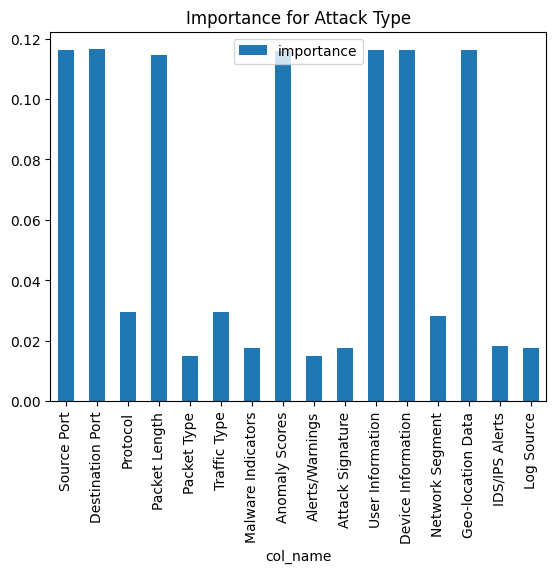

In [131]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Definimos las columnas objetivo y de características
# Sustituimos con las columnas objetivo
X_cols = [c for c in cyber_data.columns if c not in cols_to_predict]
X = cyber_data[X_cols].copy()  # Crear una copia para evitar advertencias de asignación

# Convertimos columnas categóricas a tipo 'category' y luego a códigos numéricos
for c in X.select_dtypes(include='object').columns:
    X[c] = X[c].astype('category').cat.codes

# Entrenamos y mostrar la importancia de características para cada columna objetivo
for y_col in cols_to_predict:
    # Asegurarse de que la columna objetivo es categórica y obtener los códigos numéricos
    y = cyber_data[y_col].astype('category').cat.codes

    # Entrenamos el modelo
    clf = RandomForestClassifier(random_state=42).fit(X, y)
    
    # Mostramos la importancia de características
    feature_importance = pd.DataFrame({
        "col_name": X.columns,
        "importance": clf.feature_importances_
    })
    
    # Graficamos la importancia de características
    feature_importance.plot.bar(x="col_name", y="importance", title=f"Importance for {y_col}")
    plt.show()


In [134]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

for y_col in cols_to_predict:
    # Convertimos la columna objetivo a tipo categoría y obtener los códigos numéricos
    y = cyber_data[y_col].astype('category').cat.codes
    
    # Dividimos los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    # Entrenamos el modelo
    clf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
    
    # Predecimos los valores en el conjunto de prueba
    y_pred = clf.predict(X_test)
    
    # Imprimimos el reporte de clasificación y la matriz de confusión
    print(f"Classification report for {y_col}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 40)
    print()


Classification report for Action Taken
              precision    recall  f1-score   support

           0       0.34      0.39      0.36      3372
           1       0.33      0.32      0.33      3297
           2       0.34      0.29      0.32      3331

    accuracy                           0.34     10000
   macro avg       0.34      0.33      0.33     10000
weighted avg       0.34      0.34      0.33     10000

Confusion Matrix:
[[1302 1086  984]
 [1301 1067  929]
 [1262 1087  982]]
----------------------------------------

Classification report for Severity Level
              precision    recall  f1-score   support

           0       0.32      0.37      0.34      3249
           1       0.34      0.32      0.33      3341
           2       0.35      0.32      0.33      3410

    accuracy                           0.34     10000
   macro avg       0.34      0.34      0.33     10000
weighted avg       0.34      0.34      0.33     10000

Confusion Matrix:
[[1208 1020 1021]
 [1274 

In [ ]:
CONCLUSIONES